# 第三次个人作业（机器学习 + 社会网络分析，满分15分）

### 第一部分：机器学习（本部分满分10分）

1.1（共6分）请针对Cylinder Bands数据集（bands.data文件）以最后一个字段（band type）为标签，利用第5个至第39个字段为特征建立分类模型。  
数据集介绍请参考[链接](https://archive.ics.uci.edu/ml/datasets/Cylinder+Bands)。注意，模型准确率不影响本作业的得分。

作业具体要求如下：

1.1.1 数据预处理（2分）  
(1) 选择合适的预处理处理方式对标称变量编码（1分）；   
(2) 找到缺失值，并选择合适方式对缺失值填充（1分）。  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [ ]:



data = pd.read_csv('bands.data')
data.columns=['timestamp','cylinder number','customer','job number','grain screened','ink color','proof on ctd ink','blade mfg',
                     'cylinder division','paper type','ink type','direct steam','solvent type','type on cylinder','press type','press','unit number',
                     'cylinder size','paper mill location','plating tank','proof cut','viscosity','caliper','ink temperature','humifity','roughness','blade pressure',
                     'varnish pct','press speed','ink pct','solvent pct','ESA Voltage','ESA Amperage','wax','hardener','roller durometer','current density','anode space ratio',
                     'chrome content','band_type']

data.info()

(data[data.isnull().values==True])


In [ ]:
numeric_nalist = ['proof cut','viscosity','caliper','ink temperature','humifity','roughness','blade pressure','varnish pct','press speed',
                  'ink pct','solvent pct','ESA Voltage',
                  'ESA Amperage','wax','hardener','roller durometer','current density','anode space ratio','chrome content']
nominal_nalist = ['plating tank','cylinder size','paper mill location']

\

for i in numeric_nalist:
    #print(data[i])
    data[i].replace('?',np.nan,inplace=True)
    data[i] = data[i].replace('band',np.nan) #处理脏数据
    data[i] = data[i].astype(float)
    data[i].fillna(value=data[i].mean(), inplace=True)

data = data.dropna(how='any')
    
    
data['band_type'].fillna('nonband', inplace=True)

#print(data)
data[data.isnull().values==True]



In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#data_le = pd.DataFrame(data)

for i in data.columns[4:21]:
    data[i] = labelencoder.fit_transform(data[i])
  
data['band_type'] = labelencoder.fit_transform(data['band_type'])  
    



In [ ]:
#對於定類類型的數據，建議使用one-hot encoding。定類類型就是純分類，不排序，沒有邏輯關係。
# 比如性別分男和女，男女不存在任何邏輯關係，我們不能說男就比女好，或者相反。再者，中國各省市分類也可以用獨熱編碼，同樣各省不存在邏輯關係，
# 這時候使用one-hot encoding會合適些。但注意，一般會捨去一個變量，比如男的對立面肯定是女，那麼女就是重複信息，所以保留其中一個變量即可。
#pd.get_dummies(data['band_type'])


#以最后一个字段（band type）为标签，利用第5个至第39个字段为特征建立分类模型。  
features = data.iloc[:,4:39]

label = data.band_type


1.1.2 建立模型（2分）：选择2个不同的模型进行建模，并统计训练准确率。

 第一个模型：高斯朴素贝叶斯
 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



#將資料區分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size=0.2, random_state=1)


clf = GaussianNB(var_smoothing=1e-8)
#prior:
#可輸入任何類陣列結構，形狀為（n_classes，）,表示類的先驗概率。
#如果指定，則不根據資料調整先驗，如果不指定，則自行根據資料計算先驗概率P(Y)。
#浮點數，可不填（預設值= 1e-9）
#var_smoothing:
#在估計方差時，為了追求估計的穩定性，將所有特徵的方差中最⼤大的方差以某個比例新增到估計的方差中。
#這個比例，由var_smoothing引數控制。
clf.fit(X_train, y_train)


In [ ]:
y_pred = clf.predict(X_test)
acc = np.sum(y_test == y_pred) / X_test.shape[0]
print("Test Acc : %.3f" % acc)

# 預測
y_proba = clf.predict_proba(X_test[:1])
#X_test[:1]表示的是第一個樣本，y_proba輸出的是一個概率值。
print(clf.predict(X_test[:1]))
#predict直接輸出的預測的分類值
print("预计的概率值:", y_proba)


第二个模型：决策树

In [ ]:
from sklearn import tree 

X_train2, X_test2, y_train2, y_test2 = train_test_split(features,label, test_size=0.3, random_state=0)
clf2 = tree.DecisionTreeClassifier().fit(X_train2, y_train2)


In [ ]:
y_pred2 = clf2.predict(X_test2)
acc2 = np.sum(y_test2 == y_pred2) / X_test2.shape[0]
print("Test Acc : %.3f" % acc2)

# 預測
y_proba2 = clf2.predict_proba(X_test2[:1])
#X_test[:1]表示的是第一個樣本，y_proba輸出的是一個概率值。
print(clf2.predict(X_test2[:1]))
#predict直接輸出的預測的分類值
print("预计的概率值:", y_proba2)

图像化决策树

In [ ]:
from matplotlib import pyplot as plt
dot_data = tree.export_graphviz(clf2, out_file = None)

#fig, ax = plt.subplots(figsize=(25, 25))
plt.figure(figsize=(20,20))
tree.plot_tree(clf2, fontsize=12)

plt.show()

#graph.write_pdf(‘predict.pdf’)

\1.1.3 模型比较（2分）  
(1) 比较不同模型的混淆矩阵（1分）；  


In [ ]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None))
print(confusion_matrix(y_test2, y_pred2, labels=None, sample_weight=None))

disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
disp2 = plot_confusion_matrix(clf, X_test2, y_test2, cmap=plt.cm.Blues, normalize='true')

(2) 比较不同模型的ROC曲线（0.5分） ；   
(3) 比较不同模型的AUC值（0.5分） 。

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred), pos_label=1)
auc = auc(fpr, tpr)
print('GaussianNB的AUC值：',auc)

plt.plot(fpr, tpr, color = 'purple', marker='s',label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic for GaussianNB')


plt.show()
#plt.xlim([0, 1])
#plt.ylim([0, 1])

In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(np.array(y_test2), np.array(y_pred2),sample_weight=None)

from sklearn.metrics import auc
auc_2 = auc(fpr2, tpr2)
print('DecisionTree 的 AUC 值：',auc_2)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr2, tpr2, color = 'orange', marker='s',label = 'AUC = %0.2f' % auc_2)
plt.legend(loc = 'lower right')
plt.show()



1.2.（共4分）请利用"BASKET.txt"数据集进行分析。  
作业具体要求如下：

1.2.1 探索性数据分析（2分）  


In [ ]:
data = pd.read_csv('BASKETS.txt')

(1) 分析数据集中除cardid以外各个字段分布情况，并绘图展示（1分）；

In [ ]:
value = data.value
income = data.income.cumsum()
age = data.age

fig = plt.figure()
#axe = fig.add_subplot()

sns.displot(value,binwidth=3)
sns.displot(income,bins=20)
sns.displot(age)
plt.show()

import matplotlib.pyplot as plt
data.columns
colormap = ['#1f7a8c','#ffd670','#5f0f40']

for i in ['pmethod', 'sex', 'homeown']:
    parameters = data[i].unique()
    category = []
    for k in parameters:
        a = data.groupby(i).get_group(k)
        category.append(len(a))
    
   
    plt.title('distribution of different'+i+'in this data')
    plt.pie(category,labels=parameters,colors=colormap,autopct="%3.1f%%",startangle=6.0)
    #plt.bar(,align='center',width=.8,color='salmon')
    plt.show()
    print(parameters,':')
    print(category)
    




(2) 分析支付方式（pmethod）与金额（value）、性别（sex）、是否有房屋（homeown），收入（income）、年龄（age）之间的关系；请大家分别分析支付方式与题目中所列其他各变量之间的关系（1分）。

In [ ]:
sns.displot(data, x="value", col="pmethod")
sns.displot(data, x="sex", col="pmethod",binwidth=3)


1.2.2 关联规则挖掘（2分）  
(1) 利用fruitveg, freshmeat, dairy, cannedveg, cannedmeat, frozenmeal, beer, wine, softdrink, fish, confectionery字段进行关联规则挖掘
，可自行指定最小支持度和最小置信度阈值，并给出理由（1分）；     


如果根据公司策略想找寻更多不同种类的产品组合，那么可将最小支持度降低，此举将帮助我们找到更多的产品组合。

新增的产品组合中若有支持度低但提升度高的组合，即为具有潜力的产品组合。然而最小支持度过低，容易造成商品组合的决策困难，因为可能在选出的组合中，该商品销售量虽少却具有不错的销售潜力，但却因支持度太低，而没有被选为最终的产品组合。本次案例中我观察各种结果、搭配题目要求之后将支持度设为0.062。其必须根据实际情形不同进行更动。

In [ ]:
market_data = set()

#print(data.columns[7:19])
for i in data.index:
    #print(data.loc[i])
    a = []
    for col in data.columns[7:19]:
        if data.loc[i,col] == 'T':
            a.append(col)
        else:
            pass
   
    market_data.add(tuple(a))

from efficient_apriori import apriori

association_rules = apriori(market_data, min_support=0.062, min_confidence=0.65)
association_results = list(association_rules)


(2) 选出至少4条找到的关联规则进行比较和解释（1分）。

In [ ]:
for i in association_rules[-1:-2:-1]:
    print(i)

rules = association_rules

我找到的规则有
- 啤酒、肉类罐头 -> 罐头蔬菜
- 罐头蔬菜、速冻食品 -> 啤酒
- 啤酒、速冻食品 -> 罐头蔬菜
- 啤酒、罐头蔬菜 -> 速冻食品

可以发现速冻食品、啤酒、罐头蔬菜是这间商店中常常被一起购买的商品，推测是一种顾客的生活模式造成的倾向（这些食物都不如生鲜或者红酒等一样有严格保质期、需要较为复杂的处理或者鉴赏区分能力）
知道这间店的顾客有打包购买非生鲜类产品（速冻食品、罐头）等的倾向（一次会购买不只一种非生鲜产品）

### 第二部分：社会网络分析（本部分满分5分）

数据：MAG数据可视化领域的数据（和之前的练习、作业相同的数据）。

2.1 请构建作者和作者之间的合著网络（节点：作者；无向边：两个作者之间存在合著关系，即他们至少一次同时出现在一篇论文的作者列表中；边的权重：两个作者间的合著次数）。计算以下指标或回答以下问题（共2.75分）：

In [ ]:
import networkx as nx
import nxviz as nv
from collections import Counter

data = pd.read_csv('data_sn/dataset/author2paper_table.txt')

#print(data.columns)

df = pd.DataFrame(columns=['paper_id','author_id','author_sequence_number'])

for i in range(1,len(data.index)):
    df.loc[i] = str(data.iloc[i].values).split(';',3)
    
for i in range(1,58139):
    df.paper_id[i] = df.paper_id[i].replace('[','')
    df.paper_id[i] = df.paper_id[i].replace('\'','')
    df.author_sequence_number[i] = df.author_sequence_number[i].replace('\'','')
    df.author_sequence_number[i] = df.author_sequence_number[i].replace(']','')

In [ ]:
G = nx.Graph()
G.add_nodes_from(df.author_id.unique())

In [ ]:
for i in df.paper_id.unique():
    paper = df.groupby('paper_id').get_group(i)
    authorsList = paper.author_id.tolist()
    #print(authorsList)
    for j in range(0,len(authorsList)):
        for k in range(len(authorsList)-1,j,-1):
            try:
                w = nx.get_edge_data(G,authorsList[j],authorsList[k])
                G.add_edge(authorsList[j],authorsList[k],weight=w+1)
            except:
                G.add_edge(authorsList[j],authorsList[k],weight=1)
            

（1）网络中节点的数量（0.25分）；


In [ ]:
print(G.number_of_nodes())

（2）网络中边的数量（0.25分）；

In [ ]:
print(G.number_of_edges())

（3）网络的平均聚类系数（Average clustering coefficient）（0.25分）；

In [ ]:
nx.average_clustering(G)

（4）网络的密度（0.25分）；

In [ ]:
nx.density(G)

（5）对边权的分布做可视化，并对可视化结果做简要描述（0.5分，其中可视化0.25分，描述0.25分）；

（6）对节点的度分布进行描述（0.5分，其中对度分布进行适当的可视化0.25分，对结果做描述0.25分）；

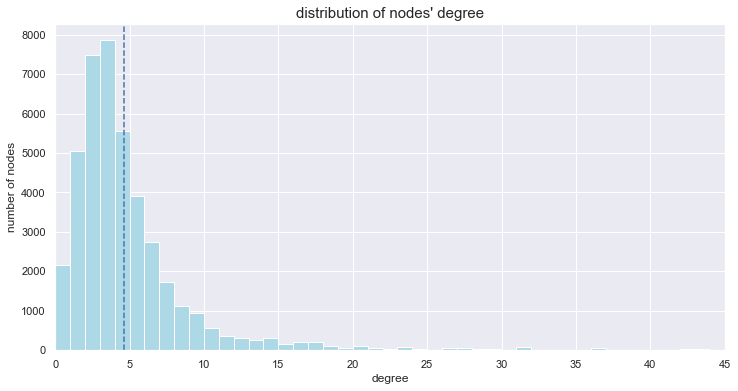

In [489]:
plt.figure(figsize=(12,6))
de = dict(G.degree)
#print(de)
# keys为节点的id，values为节点对应的出度
keys = [de[v] for v in de.keys()]
values = [v for v in de.values()]

mean =np.array(values).sum()/len(values)
plt.hist(values,bins=len(values),color="lightblue" ,alpha=1,width=1)
plt.axvline(mean,linestyle="--")
#plt.annotate(mean+1,8000,'average degree num of the nodes:'+str(mean))
plt.annotate('average degree num of the nodes:'+str(mean),xy=(mean,9000),xytext=(mean+2,8000),
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color="b"))
plt.xlabel("degree")
plt.ylabel("number of nodes")
plt.xlim(0,45)
plt.xticks(np.arange(0,50,5))
plt.title('distribution of nodes\' degree',fontsize=15)
plt.show()


节点度数皆小于50，平均数是4.65左右，可以推测每个作者的平均学术合作伙伴为4-5个。

（7）选择网络中节点度数最高的5个节点，然后计算它们的degree centrality和closeness centrality（0.75分）。

In [ ]:

c_central = nx.closeness_centrality(G)
d_central = nx.degree_centrality(G)
print("网络中节点度数最高的5个节点:")
for i in range(0,6):
    k = str(degreeSorted[i]).split(",")[0].replace("(","").replace("'","")
    print("节点的作者id: "+k)
    print("closeness centrality:",c_central[k])
    print("degree centrality:",d_central[k])


2.2 请构建论文和论文之间的引用网络（节点：论文，有向边：论文A引用了论文B，意即论文B出现在了A的参考文献列表中，边的权重：无）。计算以下指标或回答以下问题（共1.75分）：

In [ ]:
data_paper = pd.read_csv('data_sn/dataset/citation_table.txt')
df2 = pd.DataFrame(columns=['citing_id','cited_id'])

for i in range(1,len(data_paper.index)):
    df2.loc[i] = str(data_paper.loc[i].values).split(';',2)

In [ ]:
for i in range(1,230166):
    df2.citing_id[i] = df2.citing_id[i].replace('[','')
    df2.citing_id[i] = df2.citing_id[i].replace('\'','')
    df2.cited_id[i] = df2.cited_id[i].replace('\'','')
    df2.cited_id[i] = df2.cited_id[i].replace(']','')

In [ ]:
G2= nx.DiGraph()
G2.add_nodes_from(df2.citing_id.unique())


In [491]:
for i in range(1,len(df2)):
    G2.add_edge(df2.citing_id[i],df2.cited_id[i])


（1）找出两个你认为比较“重要”的节点（建议使用上课提到的几种中心性），然后计算它们之间的最短路径（0.5分）；


In [ ]:
c_central = nx.closeness_centrality(G2)
d_central = nx.degree_centrality(G2)

c_central #皆为0，所以不使用

sortedDC = sorted(d_central.items(),key=lambda i:i[1],reverse=True) #对degree_centrality结果进行排序

In [ ]:
top2 = [] #找出度数中心度最高的两节点
for i in [0,2]:
    top2.append(str(sortedDC[i]).split(",")[0].replace("(","").replace("'",""))
    
try:
    nx.shortest_path(G2,top2[0],top2[1])
except:
    print("两节点之间没有最短路径")



（2）从现在的引用网络中构建一个子网络，这个子网络的所有节点在原引用网络都至少被引5次，这个子网络的边即上述筛选过的节点之间的引用关系。请使用边列表（edgelist）的形式将这个子网络写（write）入一个文件中。（1.25分，其中正确的建立子网络1分，写入文件0.25分）；

In [ ]:
degree = G2.degree()
#a = dict(a)
degreeDict = {}
for data in degree:
    data = str(data).replace('\'',"").replace('(',"").replace(')',"")
    data = data.split(",",2)
    degreeDict[data[0]]=data[1]

degreeSorted = sorted(degreeDict.items(),key=lambda i:i[1],reverse=True)
    
ddf = pd.DataFrame(degreeSorted,columns=['nodes','cited'])
ddf.cited = ddf.cited.astype(int)


In [ ]:
ddf = ddf[ddf.cited > 5]

IndexError: single positional indexer is out-of-bounds

2.3 简要回答（不超过200字）：什么是六度分割理论？它有什么应用？（0.5分）

**六度分割理论**：由哈佛大学心理学教授 Stanley Milgram通过信封实验，发现世界上所有互不相识的人只需要很少(6位)中间人就能建立起联系。也就是说在人与人形成的网络中，一人与任意另一人之间的最短路径不会超过6，称为小世界现象(又称小世界效应)。其理论应用在技术层面证实了社交网络的可行性：人与人的社交关联存在短路径，人们之间可以通过社交网络形成关联。促成了近年面向社交的网络服务——SNS的发达。也是透过社交网络，人与人的联系变得更紧密、容易。
